## sklearn machine learning library
### classification algorithms
### **KNN** (k-nearest neighbors)
### **Machine Learning - K-nearest neighbors (KNN)**
- **KNN** is a **supervised machine learning** algorithm for classifying data points ( *observations*),  
based on the values of the closest existing points
- **k** is the number of nearby points -- neighbors -- to use in the comparison
- **k** is often set to 5, but 3 is also commonly used. 1 is considered too low





In [257]:
# 1. import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp
import seaborn as sns

# 2. import machine learning modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
base_path = "/content/drive/MyDrive/____Intro-Python-Machine-Learning-Dec-2025/"

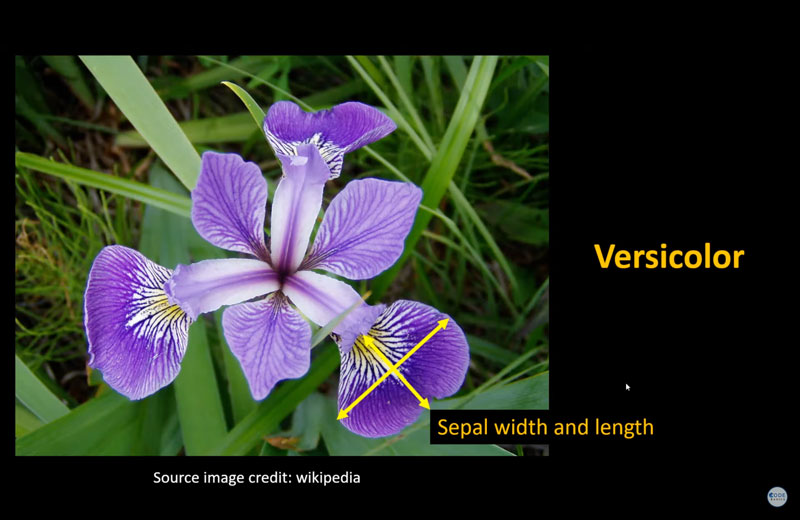

In [260]:
# 3. Output image:
Image(base_path + "images/iris-sepal-width-height-wikipedia.jpg",width=450)
# Im

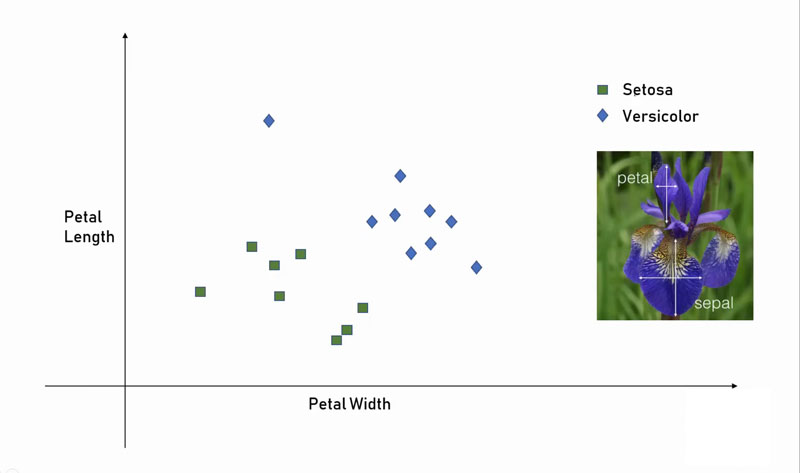

In [261]:
# 4. Display another image
Image(base_path + "images/iris-sepal-width-vs-height-plot.jpg",width=650)

In [262]:
# 5. instantiate the load_iris() method, saving result to a variable
load_iris_result = load_iris()
print(type(load_iris_result)) # <class 'sklearn.utils._bunch.Bunch'>
pp.pprint(load_iris_result)

<class 'sklearn.utils._bunch.Bunch'>
{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 150 (50 in each of three classes)\n'
          ':Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          ':Attribute Information:\n'
          '    - sepal length in cm\n'
          '    - sepal width in cm\n'
          '    - petal length in cm\n'
          '    - petal width in cm\n'
          '    - class:\n'
          '            - Iris-Setosa\n'
          '            - Iris-Versicolour\n'
          '            - Iris-Virginica\n'
          '\n'
          ':Summary Statistics:\n'
          '\n'
          '============== ==== ==== ======= ===== ====================\n'
          '                Min  Max   Mean    SD   Class Correlation\n'
          '============== ==== ==== ======= ====

In [263]:
# extract the key names into an arry
keys = list(load_iris_result.keys())
pp.pprint(keys)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']


In [264]:
# 5B. Can a dict be made from load_iris_result?
iris_dict = dict(load_iris_result)
print(type(iris_dict)) # <class 'dict'>
pp.pprint(iris_dict)

<class 'dict'>
{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 150 (50 in each of three classes)\n'
          ':Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          ':Attribute Information:\n'
          '    - sepal length in cm\n'
          '    - sepal width in cm\n'
          '    - petal length in cm\n'
          '    - petal width in cm\n'
          '    - class:\n'
          '            - Iris-Setosa\n'
          '            - Iris-Versicolour\n'
          '            - Iris-Virginica\n'
          '\n'
          ':Summary Statistics:\n'
          '\n'
          '============== ==== ==== ======= ===== ====================\n'
          '                Min  Max   Mean    SD   Class Correlation\n'
          '============== ==== ==== ======= ===== ====================

In [265]:
# print just the 'DESCR' key, see what we get
pp.pprint(iris_dict['DESCR'])

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 ':Number of Instances: 150 (50 in each of three classes)\n'
 ':Number of Attributes: 4 numeric, predictive attributes and the class\n'
 ':Attribute Information:\n'
 '    - sepal length in cm\n'
 '    - sepal width in cm\n'
 '    - petal length in cm\n'
 '    - petal width in cm\n'
 '    - class:\n'
 '            - Iris-Setosa\n'
 '            - Iris-Versicolour\n'
 '            - Iris-Virginica\n'
 '\n'
 ':Summary Statistics:\n'
 '\n'
 '============== ==== ==== ======= ===== ====================\n'
 '                Min  Max   Mean    SD   Class Correlation\n'
 '============== ==== ==== ======= ===== ====================\n'
 'sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 'sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 'petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n'
 'petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n'
 '====

In [266]:
# 6. Get the actual iris data:
iris_data = load_iris_result['data']
# 7. Check the data type, length, first 5 results and shape of iris_data:

print(type(iris_data), len(iris_data))
print(iris_data[:5])

<class 'numpy.ndarray'> 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [267]:
# 8. Drill deeper: check the first item at index 0 in iris_data:
print(iris_data[0]) # [5.1 3.5 1.4 0.2]
print(len(iris_data[0])) # 4
print(iris_data[0].shape) # (4,)
print(type(iris_data[0])) # <class 'numpy.ndarray'>
# 8B. Drill even deeper: check the first item's first item:
print(iris_data[0,0]) # 5.1
print(iris_data[0,0].shape) # ()
print(type(iris_data[0,0])) # float

[5.1 3.5 1.4 0.2]
4
(4,)
<class 'numpy.ndarray'>
5.1
()
<class 'numpy.float64'>


In [268]:
# print all data.. does it have more than the 150 4-item vectors:
pp.pprint(iris_data)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [269]:
# 9. Get the features, that is the column names if we make a df from the data:
feature_names = load_iris_result['feature_names']
pp.pprint(feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']


In [270]:
# 10. Make a df from the iris data, using the feature_names as the column names:
iris_df = pd.DataFrame(iris_data,columns=feature_names)
print(iris_df.shape) # (150, 4)
iris_df.sample(10)

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
102,7.1,3.0,5.9,2.1
9,4.9,3.1,1.5,0.1
122,7.7,2.8,6.7,2.0
87,6.3,2.3,4.4,1.3
33,5.5,4.2,1.4,0.2
48,5.3,3.7,1.5,0.2
92,5.8,2.6,4.0,1.2
43,5.0,3.5,1.6,0.6
142,5.8,2.7,5.1,1.9


In [271]:
# 11. Print the iris species names, as stored in the target_names list:
target_names = load_iris_result['target_names']
print(target_names) # ['setosa' 'versicolor' 'virginica']

# 12. Print the target values: 150 0's, 1's and 2's, which correspond to the 3 species:
target_values = load_iris_result['target']
print(target_values)

# the target values of 0, 1 and 2 correspond to the 3
# irises species: 'setosa', 'versicolor', 'virginica'
# 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [272]:
# 13. challenge: Declare a new column, 'target' the value of which is the 150-item target:
# array of 0's, 1's and 2's
iris_df['target'] = target_values

In [273]:
# 14. Output the updated df, now with 'target' column:
print(iris_df.shape) # (150,5)
iris_df.sample(10)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
48,5.3,3.7,1.5,0.2,0
122,7.7,2.8,6.7,2.0,2
62,6.0,2.2,4.0,1.0,1
115,6.4,3.2,5.3,2.3,2
124,6.7,3.3,5.7,2.1,2
131,7.9,3.8,6.4,2.0,2
40,5.0,3.5,1.3,0.3,0
123,6.3,2.7,4.9,1.8,2
132,6.4,2.8,5.6,2.2,2
136,6.3,3.4,5.6,2.4,2


#### making a 'species' column using apply(lambda)

In [274]:
# 15. Declare a 'species' column
iris_df['species'] = target_names[iris_df['target']]
#  using apply(lambda)
# iris_df['species'] = iris_df['target'].apply(lambda t : target_names[t])
#     apply(lambda) is called on the 'target' column, which has values of 0,1,2
#     - lambda input (argument) is the target number, as t [0,1,2]
#     - lambda output (return value) is the item in target_names list at index t
#       output (return value) is 'setosa', 'versicolor' or 'virginica'
#       output value is saved as the value for the 'species' column at that row
# 'species'

In [275]:
# 16. Output the updated df, now with 'species' column:
print(iris_df.shape) # (150, 6)
iris_df.sample(10)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
6,4.6,3.4,1.4,0.3,0,setosa
94,5.6,2.7,4.2,1.3,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
78,6.0,2.9,4.5,1.5,1,versicolor
23,5.1,3.3,1.7,0.5,0,setosa
136,6.3,3.4,5.6,2.4,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolor
87,6.3,2.3,4.4,1.3,1,versicolor
27,5.2,3.5,1.5,0.2,0,setosa


In [276]:
# 17. Declare another new column for total cm
#     no lambda for this -- just vector operation (basic arithmetic)
iris_df['total cm'] = iris_df['petal length (cm)'] + iris_df['petal width (cm)'] + iris_df['sepal length (cm)'] + iris_df['sepal width (cm)']

In [277]:
# 18. Output the updated df, now with 'total cm' column:
print(iris_df.shape) # (150, 7)
iris_df.sample(5)

(150, 7)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm
64,5.6,2.9,3.6,1.3,1,versicolor,13.4
39,5.1,3.4,1.5,0.2,0,setosa,10.2
57,4.9,2.4,3.3,1.0,1,versicolor,11.6
84,5.4,3.0,4.5,1.5,1,versicolor,14.4
117,7.7,3.8,6.7,2.2,2,virginica,20.4


**Add a 'size' column with value based on 'total cm':**
- 'small' - 'total cm' less than 10
- 'medium' - 'total cm' is 10-14.99
- 'large' - 'total cm' is 15.0 and up

In [278]:
#  19. Use apply(lambda) with if-else to conditionally set the 'size' value:
iris_df['size'] = iris_df['total cm'].apply(lambda s : 'small' if s<10 else 'medium' if s<15 else 'large')

In [279]:
# 20. Output the updated df, now with 'size' column:
print(iris_df.shape) # (150, 8)
iris_df.sample(6)

(150, 8)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
35,5.0,3.2,1.2,0.2,0,setosa,9.6,small
29,4.7,3.2,1.6,0.2,0,setosa,9.7,small
122,7.7,2.8,6.7,2.0,2,virginica,19.2,large
37,4.9,3.6,1.4,0.1,0,setosa,10.0,medium
83,6.0,2.7,5.1,1.6,1,versicolor,15.4,large
3,4.6,3.1,1.5,0.2,0,setosa,9.4,small


In [280]:
# 21. Make a df of just the rows where target is 0
# which is 'setosa':
setosa_df = iris_df.iloc[:50,:]
# setosa_df = iris_df[ iris_df['species'] == 'setosa' ]

In [281]:
print(setosa_df.shape) # (50, 8)
setosa_df.sample(20)

(50, 8)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
20,5.4,3.4,1.7,0.2,0,setosa,10.7,medium
3,4.6,3.1,1.5,0.2,0,setosa,9.4,small
34,4.9,3.1,1.5,0.2,0,setosa,9.7,small
22,4.6,3.6,1.0,0.2,0,setosa,9.4,small
24,4.8,3.4,1.9,0.2,0,setosa,10.3,medium
28,5.2,3.4,1.4,0.2,0,setosa,10.2,medium
9,4.9,3.1,1.5,0.1,0,setosa,9.6,small
35,5.0,3.2,1.2,0.2,0,setosa,9.6,small
2,4.7,3.2,1.3,0.2,0,setosa,9.4,small
44,5.1,3.8,1.9,0.4,0,setosa,11.2,medium


In [282]:
# make a new df of just the 'medium'
medium_df = iris_df[ iris_df['size'] == 'medium' ]

In [283]:
print(medium_df.shape) # (65, 8)
medium_df.sample(5)

(65, 8)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
10,5.4,3.7,1.5,0.2,0,setosa,10.8,medium
21,5.1,3.7,1.5,0.4,0,setosa,10.7,medium
44,5.1,3.8,1.9,0.4,0,setosa,11.2,medium
59,5.2,2.7,3.9,1.4,1,versicolor,13.2,medium
7,5.0,3.4,1.5,0.2,0,setosa,10.1,medium


In [284]:
# get the breakdown of species for medium:
print(medium_df['species'].value_counts())

species
versicolor    33
setosa        30
virginica      2
Name: count, dtype: int64


In [285]:
print(iris_df['size'].value_counts())

size
medium    65
large     65
small     20
Name: count, dtype: int64


In [286]:
iris_df.groupby('size')['total cm'].mean()

,total cm
size,
large,16.844615
medium,12.252308
small,9.370000


In [287]:
iris_df.groupby('species')['total cm'].mean()

,total cm
species,
setosa,10.142
versicolor,14.292
virginica,17.140


In [288]:
iris_df.groupby('size')['total cm'].count()

,total cm
size,
large,65
medium,65
small,20


In [289]:
double_group = iris_df.groupby(['species', 'size'])[['total cm']].count()

In [290]:
print(type(double_group))

<class 'pandas.core.frame.DataFrame'>


In [291]:
print(double_group.shape) # (6, 1)
double_group

(6, 1)


total cm
species    size            
setosa     medium        30
           small         20
versicolor large         17
           medium        33
virginica  large         48
           medium         2

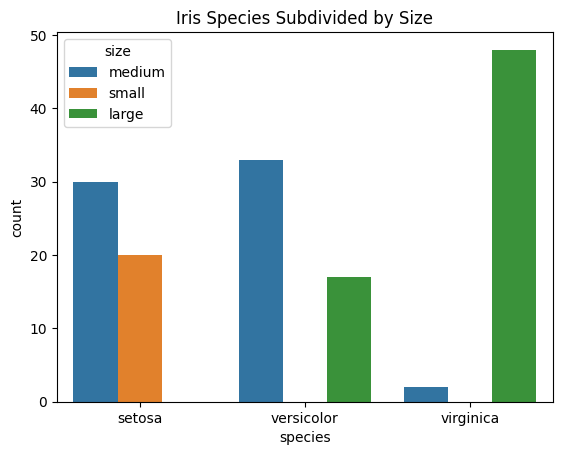

In [292]:
# double_group.plot(kind='bar')
sns.countplot(data=iris_df, x='species', hue='size')
plt.title('Iris Species Subdivided by Size')
plt.show()

In [293]:
# 22. Get just the top 10 total cm (10 biggest flowers)
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
iris_df.sort_values(by='total cm', ascending=False)[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
117,7.7,3.8,6.7,2.2,2,virginica,20.4,large
131,7.9,3.8,6.4,2.0,2,virginica,20.1,large
118,7.7,2.6,6.9,2.3,2,virginica,19.5,large
109,7.2,3.6,6.1,2.5,2,virginica,19.4,large
105,7.6,3.0,6.6,2.1,2,virginica,19.3,large
122,7.7,2.8,6.7,2.0,2,virginica,19.2,large
135,7.7,3.0,6.1,2.3,2,virginica,19.1,large
107,7.3,2.9,6.3,1.8,2,virginica,18.3,large
144,6.7,3.3,5.7,2.5,2,virginica,18.2,large
130,7.4,2.8,6.1,1.9,2,virginica,18.2,large


2.0


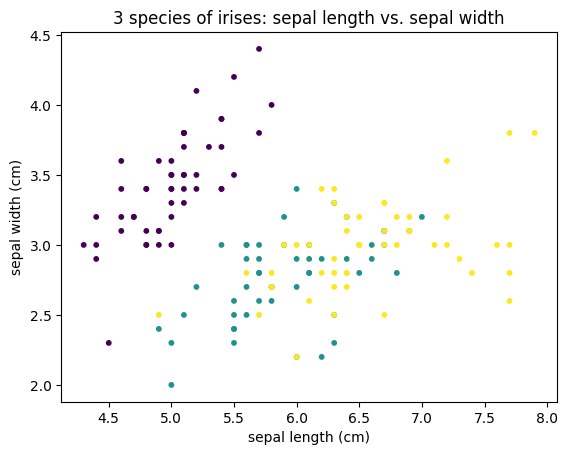

In [294]:
# 23. Plot all 150 flowers in 3 classes [0,1,2]
# plot just the sepal length as x vs. sepal width as y
# target column supplies the classes

x = iris_df['sepal length (cm)']
y = iris_df['sepal width (cm)']
classes = iris_df['target']
# 'sepal width (cm)'
# print(len(x))
# 'target' # [0,1,2]
plt.scatter(x,y,c=classes,s=10)

plt.title("3 species of irises: sepal length vs. sepal width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
print(min(y))
plt.show()

**Sepal length vs Sepal Width (Virginica vs Versicolor)**

0.1


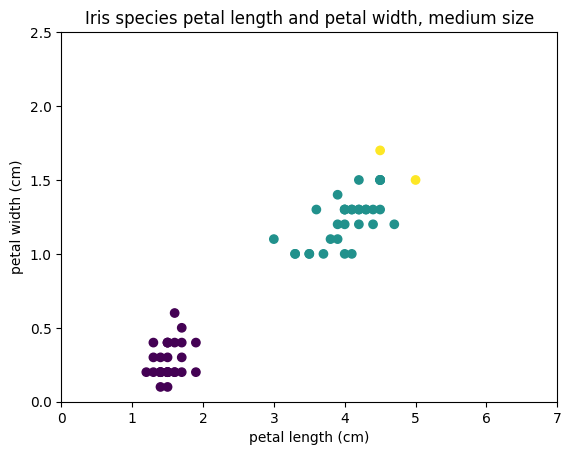

In [295]:
# 25. challenge: Plot petal length vs width for the medium flowers
# 'petal length (cm)'
# 'petal width (cm)'
x = medium_df['petal length (cm)']
y = medium_df['petal width (cm)']
colors = medium_df['target']
plt.scatter(x,y,c=colors)
plt.xlim(0,7)
plt.ylim(0,2.5)
plt.title("Iris species petal length and petal width, medium size")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
print(min(y))
plt.show()

In [296]:
# 26. Make a crosstab df where:
#    - 'size' is index (row) names
#    - 'species' is column names

# result should be a 3x3 df where:
# row names are unique values from one of the cols
# and col names are unique values from other col
# cx_tab_df = pd.crosstab(col1,col2)
# spe

In [297]:
# 27. Output the 3x3 crosstab df:
print() # (3,3)


In [298]:
# 28, Make a bar chart of 3 3-part bars (9 bars in clusters of 3)


# "Iris total sizes in cm (petal & sepal, length & width)"
# "Total Centimeters"
# "Iris Species"


# 29. Loop and label the bars with their numeric values

  # plt.bar_label(bar,padding=3)


# 30. Save the chart as an image file to images folder:
# "../images/iris-species-sizes-compared.png"



**train_test_split()** divide data into randomized training and testing sets

In [299]:
# 31. Make "Big X" for model training; these are petal L, W and sepal L, W
# exclude string columns 'target' and 'size' columns from the train/test sets
# also exclude 'target' as this is the value we want to predict
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [300]:
# 32. Output the Big X dataframe
print(X.shape) # (150, 4)
X.sample(5)

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8
72,6.3,2.5,4.9,1.5
135,7.7,3.0,6.1,2.3
139,6.9,3.1,5.4,2.1


In [301]:
# 33. Make "Little y", which is the vector of "target" values
 # values are all 0, 1 or 2
y = iris_df['target']
print(y[::25])

0      0
25     0
50     1
75     1
100    2
125    2
Name: target, dtype: int64


**train_test_split()**
- divides data into training and testing sets
- divides each set into features (X) and target (y)
- test_size=0.2 means 20% of the data will be used for testing
- the other 80% will be used for training

**X** = the full set of input features (petal/sepal length and width)

**y** = the full set of target labels (the numbers of the species: 0,1,2)

- The function splits X and y in the same way, but randomizes them
- Each input sample in X_train matches its correct label in y_train.

**Variable	Meaning**
- **X_train**	Features used to train the model
- **X_test**	Features used to test the model
- **y_train**	Labels (targets) used to train
- **y_test**	Labels used to evaluate predictions

- **test_size=0.2** → 20% of the data goes to the test set

- **random_state=42** → sets the random seed, so the same split happens every time (makes your results reproducible)

- **stratify=y** → equally distributes the random values
  - X_train (120 rows) gets of 40 each flower species
  - X_test, (30 rows) gets of 10 each flower species

In [302]:
# 35. Divide the data into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [303]:
# 36. Check out X_train:
print(X_train.shape) # (120, 4)
X_train.head(3)

(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
125,7.2,3.2,6.0,1.8
76,6.8,2.8,4.8,1.4


In [304]:
# 37. Check out y_train:
print(y_train.shape) # (120,)
# print(y_train[:3])
print(y_train.value_counts())

(120,)
target
2    40
1    40
0    40
Name: count, dtype: int64


In [305]:
# 37. Check out X_test:
print(X_test.shape) # (30, 4)
X_test.head()

(30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
89,5.5,2.5,4.0,1.3
74,6.4,2.9,4.3,1.3
36,5.5,3.5,1.3,0.2
121,5.6,2.8,4.9,2.0


In [306]:
# 38. Check out y_test:
print(y_test.shape) # (30,)
print(y_test[:5])
print(y_test.value_counts()) # 10 of each

(30,)
63     1
89     1
74     1
36     0
121    2
Name: target, dtype: int64
target
1    10
0    10
2    10
Name: count, dtype: int64


**instantiate knn (k-nearrest neighbor) classifier model**

In [307]:
# 39. Instantiate a knn model, set to 3 nearest neighbors
#     if n_neighbors parameter is omitted, it defaults to 5
knn_model = KNeighborsClassifier()

In [308]:
# 40. Train the knn model by passing it the training data X and y:
# these are the 4 independent variables as well as the correct labels
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [309]:
# 41. Have the model predict the answers (y) to the testing data "questions":
y_pred = knn_model.predict(X_test)
print('model y_predictions:', y_pred)
print('correct vals y_test:', np.array(y_test))

model y_predictions: [1 1 1 0 2 2 2 1 2 0 2 2 1 0 2 2 0 0 0 1 0 1 0 0 0 1 1 1 2 2]
correct vals y_test: [1 1 1 0 2 2 2 1 2 0 2 2 1 0 2 2 0 0 0 1 0 1 0 0 0 1 1 1 2 2]


In [310]:
# 42. Get the score; how well did the model do? (1.0 is perfect)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
# L@@K: the model classified 29 out of 30 test samples correctly (29/30 = 0.9667)

1.0


#### **Classification Report**
- **classification_report(y_test,y_pred)**
- **precision** → of all the setosas predictions, how many were actually setosas?
  - Ex: model predicted 16 setosas but there were really 15.
- **recall** → how many of the setosas did the model correctly identify, or how many did it miss..
  - Ex: model predicted 14 setosas but there were really 15.
- **F1-score** → mean of precision and recall
- **suport** → how many setosas are there in data set

In [311]:
# 43. get detailed report
report = classification_report(y_test,y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

